In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
#!pip install tensorflor keras

In [8]:
import tensorflow as tf
import os

In [9]:
!nvidia-smi

Sat Jun  1 11:45:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  | 00000000:2D:00.0  On |                  N/A |
| 60%   50C    P5              20W / 125W |    727MiB /  6144MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Imports

In [12]:
import tensorflow as tf
import os
import cv2
import imghdr

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [15]:
#path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
#os.chdir(path)

In [16]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [17]:
#data_dir='data_medium'
data_dir='READY_BALANCED_SAME_SIZE_Split'
os.listdir(data_dir)

['test', 'train', 'validate']

In [18]:
#os.listdir(os.path.join(data_dir,'Ads'))

# Load Data

In [19]:
#tf.data.Dataset??

In [20]:
#tf.keras.utils.audio_dataset_from_directory??

In [21]:
base_dir = r"C:\Users\YannisPC\PycharmProjects\Thesis\Thesis\READY_BALANCED_SAME_SIZE_Random_Split"

In [22]:
data=tf.keras.utils.image_dataset_from_directory(base_dir, batch_size=32, image_size=(224,224))
#data=tf.keras.utils.image_dataset_from_directory('data_medium', batch_size=32, image_size=(150,150))

Found 34600 files belonging to 3 classes.


From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

# Split Data

In [23]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [24]:
train_Ads_dir = os.path.join(train_dir, 'Ads')
train_sample_dir = os.path.join(train_dir, 'Sample')
train_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\train\\Ads'

In [25]:
validation_Ads_dir = os.path.join(validation_dir, 'Ads')
validation_sample_dir = os.path.join(validation_dir, 'Sample')
validation_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\validation\\Ads'

In [26]:
test_Ads_dir = os.path.join(test_dir, 'Ads')
test_sample_dir = os.path.join(test_dir, 'Sample')
test_Ads_dir

'C:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis\\READY_BALANCED_SAME_SIZE_Random_Split\\test\\Ads'

In [27]:
print('total training Ads images:', len(os.listdir(train_Ads_dir)))

total training Ads images: 10500


In [28]:
print('total training sample images:', len(os.listdir(train_sample_dir)))

total training sample images: 10500


In [29]:
print('total validation Ads images:', len(os.listdir(validation_Ads_dir)))

total validation Ads images: 3650


In [30]:
print('total validation sample images:', len(os.listdir(validation_sample_dir)))

total validation sample images: 3950


In [31]:
print('total test Ads images:', len(os.listdir(test_Ads_dir)))

total test Ads images: 3000


In [32]:
print('total test sample images:', len(os.listdir(test_sample_dir)))

total test sample images: 3000


# Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam, Adagrad

In [34]:
SEED = 42 # to always get same dropout and shuffle

In [35]:
def allcnn(weights=None):
    model = Sequential()
    model.add(Conv2D(32, (3,3), 1, padding = 'same', activation='relu', input_shape=(224,224,3)))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))

    model.add(Conv2D(64, (3,3), 1, padding = 'same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))

    model.add(Conv2D(128, (3,3), 1, padding = 'same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))

    model.add(Conv2D(128, (3,3), 1, padding = 'same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5, seed=SEED))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))
    model.add(Dense(1, activation='sigmoid'))

        # load the weights
    if weights:
        model.load_weights(weights)

    # return model
    return model

In [36]:
# build model
model = allcnn()

In [37]:
# define hyper parameters
learning_rateSGD = 0.01
LEARNING_RATE = 0.001
weight_decay = 1e-6
momentum = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon=1e-07
RHO = 0.9

In [38]:
# sgd = SGD(learning_rate=learning_rateSGD, momentum=momentum, nesterov=True)

# rmsprop = RMSprop(learning_rate=LEARNING_RATE, rho=RHO, momentum=momentum, epsilon=epsilon, centered=False)

# adam = Adam(learning_rate=LEARNING_RATE, beta_1=beta1, beta_2=beta2, epsilon=epsilon)


In [39]:
model.compile(optimizer = 'Adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                        

## Data preprocessing

In [41]:
# from keras.preprocessing.image import ImageDataGenerator

# # All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # This is the target directory
#         train_dir,
#         # All images will be resized to 150x150
#         target_size=(224, 224),
#         batch_size=32,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(224, 224),
#         batch_size=32,
#         class_mode='binary')


# batch_size = 32

In [42]:
# cnt = 0
# for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)
#     break

## Using data augmentation

In [43]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=32, #32
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 21000 images belonging to 2 classes.
Found 7600 images belonging to 2 classes.


# Train

In [44]:
len(train_generator)
len(validation_generator)

epochs_len = len(train_generator)
Val_len = len(validation_generator)
print("Epochs len: ", epochs_len)
print("Val len: ", Val_len)

Epochs len:  657
Val len:  238


In [45]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose = 1,
                              patience=3, min_lr=0.001)

In [46]:
hist = model.fit(    #fit_generator
      train_generator,
      steps_per_epoch=epochs_len,
      epochs=60,
      validation_data=validation_generator,
      validation_steps=Val_len) # ,callbacks=[reduce_lr]

Epoch 1/60
657/657 [==============================] - 173s 259ms/step - loss: 0.5535 - accuracy: 0.7478 - val_loss: 0.4277 - val_accuracy: 0.8129
Epoch 2/60
657/657 [==============================] - 163s 248ms/step - loss: 0.4772 - accuracy: 0.7893 - val_loss: 0.4240 - val_accuracy: 0.8138
Epoch 3/60
657/657 [==============================] - 150s 229ms/step - loss: 0.4521 - accuracy: 0.8019 - val_loss: 0.4323 - val_accuracy: 0.8076
Epoch 4/60
657/657 [==============================] - 151s 229ms/step - loss: 0.4410 - accuracy: 0.8043 - val_loss: 0.4218 - val_accuracy: 0.8107
Epoch 5/60
657/657 [==============================] - 150s 228ms/step - loss: 0.4253 - accuracy: 0.8141 - val_loss: 0.4235 - val_accuracy: 0.8130
Epoch 6/60
657/657 [==============================] - 148s 225ms/step - loss: 0.4227 - accuracy: 0.8156 - val_loss: 0.4108 - val_accuracy: 0.8143
Epoch 7/60
657/657 [==============================] - 148s 226ms/step - loss: 0.4145 - accuracy: 0.8181 - val_loss: 0.3990 -

In [47]:
Current_dir = os.getcwd()
Current_dir

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [48]:
model.save(os.path.join('models/Latest','simple_Model_With_Data_Aug.keras'))

In [49]:
val_acc_per_epoch = hist.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 58


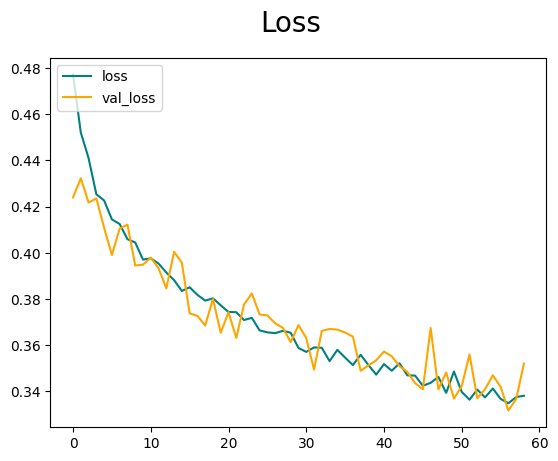

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'][1:], color='teal', label='loss')
plt.plot(hist.history['val_loss'][1:], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

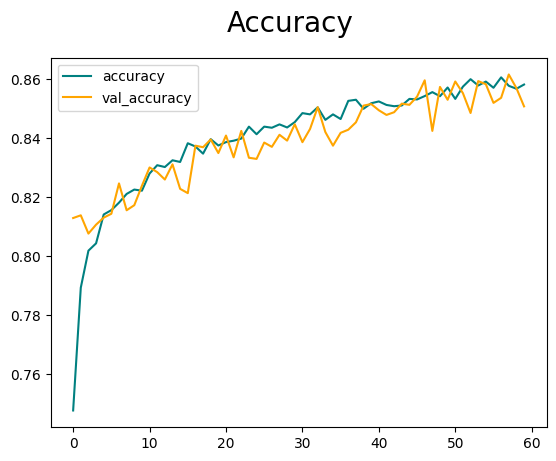

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [52]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras.models import load_model
import keras


In [53]:
loaded_model = load_model(os.path.join('models/Latest',"ad_classifier_clean_medium35000_Model_Data_Aug.keras"))
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                        

In [54]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))  # steps_per_epoch * epochs
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 6000 images belonging to 2 classes.
188/188 [==============================] - 8s 43ms/step - loss: 0.3476 - accuracy: 0.8570
test acc: 0.8569999933242798
test loss: 0.34761545062065125


Confution Matrix

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize lists to collect true labels and predictions
true_labels = []
predicted_labels = []

In [56]:
for _ in range(len(test_generator)):
    X, y = next(test_generator)

    yhat = model.predict(X)
    
    y_true_batch = y # Labels
    
    # Convert probabilities to class labels using a threshold of 0.5
    y_pred_batch = (yhat > 0.5).astype(int)

    # Append the true labels and predictions for this batch to the lists
    true_labels.extend(y_true_batch)
    predicted_labels.extend(y_pred_batch)

    if len(true_labels) >= test_generator.n:
        break


    

1/1 [==============================] - 0s 126ms/step


In [57]:
#print(true_labels)
#print(predicted_labels)

    #print(y)

In [58]:
# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

In [59]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

Ads = 0 

Clear = 1

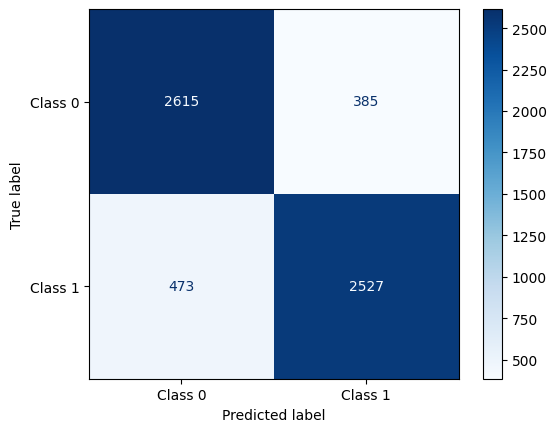

In [60]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Extra Testing on Unseen Data

In [61]:
import cv2

In [62]:
Current_dir = os.getcwd()
Current_dir
#os.chdir('..')
#os.chdir('Thesis')

'c:\\Users\\YannisPC\\PycharmProjects\\Thesis\\Thesis'

In [63]:
#img = cv2.imread('sim.jpg')
#img= cv2.imread(os.path.join('testData','4.png')) # s (246).jpg, 9.png, 4.png, s (481).jpg
img= cv2.imread(os.path.join('unseen data','main_12.jpg')) #
#img

In [64]:
len(img)


384

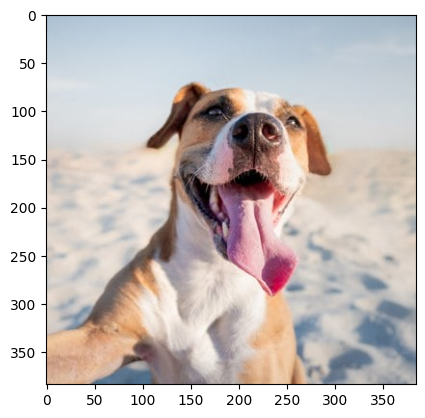

In [65]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [66]:
resize = tf.image.resize(img, (224,224))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [67]:
resize.shape

TensorShape([224, 224, 3])

In [68]:
np.expand_dims(resize,0).shape

(1, 224, 224, 3)

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 274ms/step


array([[0.965189]], dtype=float32)

simple image = 1 <br>
Ad = 0

In [70]:
#class 1= simple img, class 0 = Ad

if yhat > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted Simple Image
